# (vi) Comparison of Model Performance

## Model Results

| Metric      | Full Input Model | Reduced Input Model |
|-------------|------------------|--------------------|
| R² (All)    | 0.9724           | 0.9617             |
| MSE (All)   | 1.9250           | 2.6734             |
| R² (Test)   | 0.9671           | 0.9394             |
| MSE (Test)  | 1.5301           | 2.8187             |

## Analysis

1. **Overall Performance**: The full input model outperforms the reduced input model across all metrics.

2. **Generalization**: 
   - The full input model shows better generalization, with higher R² and lower MSE on the test set.
   - Test set performance gap: R² (0.0277 higher), MSE (1.2886 lower)

3. **Consistency**: The full input model maintains superior performance on both the entire dataset and the test set.

## Conclusion

The full input model (best_full_model.keras) is the overall best network for the following reasons:
1. Higher accuracy (R²) and lower error (MSE) across all data subsets
2. Better generalization to unseen data (test set performance)
3. Consistent superior performance indicating robust predictive capability

While the reduced input model shows good performance, the inclusion of all available features in the full input model yields optimal predictive results for body fat percentage estimation in this case.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


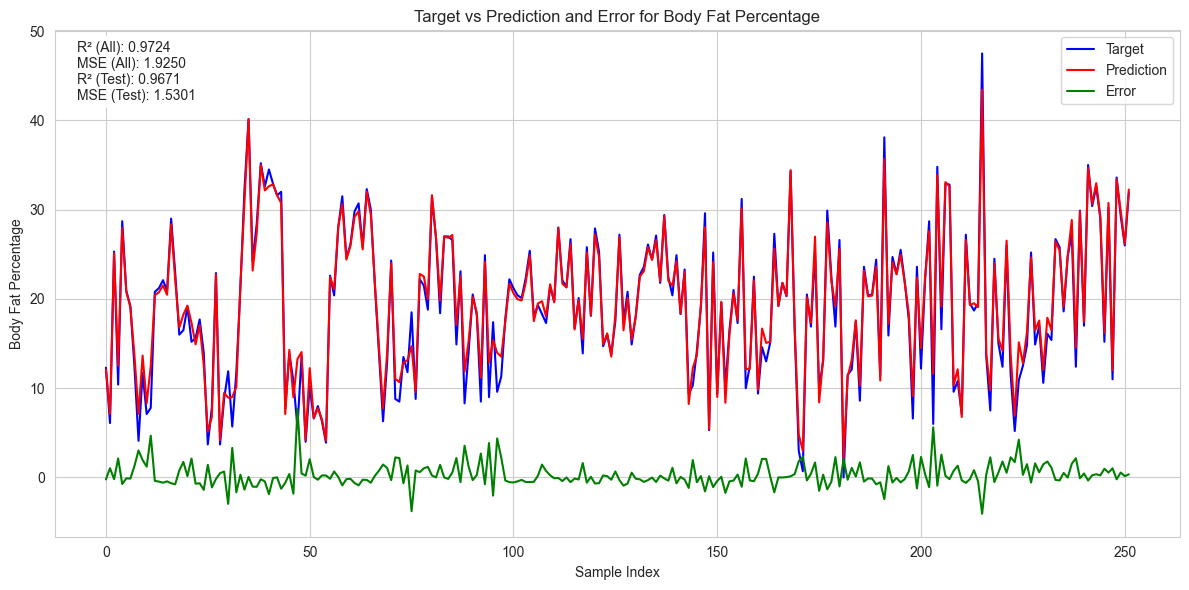

R² (All): 0.9724
MSE (All): 1.9250
R² (Test): 0.9671
MSE (Test): 1.5301


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
df = pd.read_csv('Body_Fat.csv')

# Prepare the features and target
X = df.drop('BodyFat', axis=1)
y = df['BodyFat']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Load the best model
best_model = load_model('best_full_model.keras')

# Make predictions on all data
X_all_scaled = scaler.transform(X)
y_pred_all = best_model.predict(X_all_scaled).flatten()

# Calculate statistics
r2_all = r2_score(y, y_pred_all)
mse_all = mean_squared_error(y, y_pred_all)
r2_test = r2_score(y_test, best_model.predict(X_test_scaled).flatten())
mse_test = mean_squared_error(y_test, best_model.predict(X_test_scaled).flatten())

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Target', color='blue')
plt.plot(y.index, y_pred_all, label='Prediction', color='red')
plt.plot(y.index, y_pred_all - y, label='Error', color='green')
plt.xlabel('Sample Index')
plt.ylabel('Body Fat Percentage')
plt.title('Target vs Prediction and Error for Body Fat Percentage')
plt.legend()
plt.tight_layout()

# Add text box with statistics
stats_text = f'R² (All): {r2_all:.4f}\nMSE (All): {mse_all:.4f}\nR² (Test): {r2_test:.4f}\nMSE (Test): {mse_test:.4f}'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

# Print statistics
print(f'R² (All): {r2_all:.4f}')
print(f'MSE (All): {mse_all:.4f}')
print(f'R² (Test): {r2_test:.4f}')
print(f'MSE (Test): {mse_test:.4f}')